In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Importing the dataset
dataset = pd.read_csv("D:\\krish models\\churn model ann\\churn-modellingcsv\\Churn_Modelling.csv")


In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)



In [9]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)



In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [12]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)



Using TensorFlow backend.
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  from ipykernel import kernelapp as app
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
C:\Users\USER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 639us/step - loss: 0.5828 - accuracy: 0.7313 - val_loss: 0.5195 - val_accuracy: 0.7698
Epoch 2/100
5359/5359 [==============================] - 2s 406us/step - loss: 0.4834 - accuracy: 0.7919 - val_loss: 0.4810 - val_accuracy: 0.7917
Epoch 3/100
5359/5359 [==============================] - 1s 257us/step - loss: 0.4567 - accuracy: 0.8099 - val_loss: 0.4643 - val_accuracy: 0.7974
Epoch 4/100
5359/5359 [==============================] - 1s 260us/step - loss: 0.4439 - accuracy: 0.8132 - val_loss: 0.4576 - val_accuracy: 0.8050
Epoch 5/100
5359/5359 [==============================] - 1s 250us/step - loss: 0.4368 - accuracy: 0.8156 - val_loss: 0.4518 - val_accuracy: 0.8046
Epoch 6/100
5359/5359 [==============================] - 2s 299us/step - loss: 0.4319 - accuracy: 0.8173 - val_loss: 0.4487 - val_accuracy: 0.8065
Epoch 7/100
5359/5359 [==============================] - 2s 389us/step

5359/5359 [==============================] - 2s 340us/step - loss: 0.3463 - accuracy: 0.8569 - val_loss: 0.3625 - val_accuracy: 0.8519
Epoch 57/100
5359/5359 [==============================] - 3s 518us/step - loss: 0.3449 - accuracy: 0.8582 - val_loss: 0.3632 - val_accuracy: 0.8535
Epoch 58/100
5359/5359 [==============================] - 2s 316us/step - loss: 0.3445 - accuracy: 0.8599 - val_loss: 0.3611 - val_accuracy: 0.8546
Epoch 59/100
5359/5359 [==============================] - 2s 340us/step - loss: 0.3436 - accuracy: 0.8604 - val_loss: 0.3616 - val_accuracy: 0.8519
Epoch 60/100
5359/5359 [==============================] - 2s 335us/step - loss: 0.3438 - accuracy: 0.8597 - val_loss: 0.3596 - val_accuracy: 0.8542
Epoch 61/100
5359/5359 [==============================] - 2s 304us/step - loss: 0.3426 - accuracy: 0.8599 - val_loss: 0.3595 - val_accuracy: 0.8542
Epoch 62/100
5359/5359 [==============================] - 2s 422us/step - loss: 0.3420 - accuracy: 0.8580 - val_loss: 0.3582 

In [13]:
# list all data in history

print(model_history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


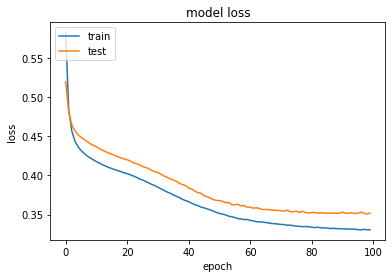

In [18]:


# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [19]:

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1525,   70],
       [ 210,  195]], dtype=int64)

In [22]:


# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86

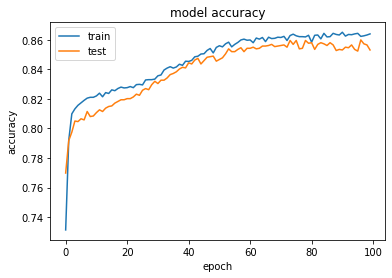

In [25]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
